# Importing Cleaned Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Load the dataset from the Final Datasets folder
file_path = 'Final Datasets/N1_Cleaned_fueldata.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary information
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972174 entries, 0 to 972173
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PUBLISH_DATE         972174 non-null  object 
 1   TRADING_NAME         972174 non-null  object 
 2   BRAND_DESCRIPTION    972174 non-null  object 
 3   PRODUCT_DESCRIPTION  972174 non-null  object 
 4   PRODUCT_PRICE        972174 non-null  float64
 5   ADDRESS              972174 non-null  object 
 6   LOCATION             972174 non-null  object 
 7   POSTCODE             972174 non-null  int64  
 8   AREA_DESCRIPTION     972174 non-null  object 
 9   REGION_DESCRIPTION   972174 non-null  object 
 10  latitude             972174 non-null  float64
 11  longitude            972174 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 89.0+ MB


(None,
   PUBLISH_DATE            TRADING_NAME BRAND_DESCRIPTION PRODUCT_DESCRIPTION  \
 0   2020-01-01          7-eleven ascot          7-eleven                 ULP   
 1   2020-01-01       7-eleven balcatta          7-eleven                 ULP   
 2   2020-01-01          7-eleven balga          7-eleven                 ULP   
 3   2020-01-01  7-eleven banksia grove          7-eleven                 ULP   
 4   2020-01-01     7-eleven bassendean          7-eleven                 ULP   
 
    PRODUCT_PRICE                 ADDRESS       LOCATION  POSTCODE  \
 0          156.5   194 Great Eastern Hwy          ASCOT      6104   
 1          153.9         174 Balcatta Rd       BALCATTA      6021   
 2          157.5         102 Princess Rd          BALGA      6061   
 3          157.5  1/300 Joseph Banks Bvd  BANKSIA GROVE      6031   
 4          157.5      302-318 Collier Rd     BASSENDEAN      6054   
 
   AREA_DESCRIPTION REGION_DESCRIPTION   latitude   longitude  
 0   South of River

In [3]:
# Sending data to another variable

data_cleaned = data
print (data_cleaned)

       PUBLISH_DATE            TRADING_NAME BRAND_DESCRIPTION  \
0        2020-01-01          7-eleven ascot          7-eleven   
1        2020-01-01       7-eleven balcatta          7-eleven   
2        2020-01-01          7-eleven balga          7-eleven   
3        2020-01-01  7-eleven banksia grove          7-eleven   
4        2020-01-01     7-eleven bassendean          7-eleven   
...             ...                     ...               ...   
972169   2024-08-23           vibe wanneroo              vibe   
972170   2024-08-23           vibe wanneroo              vibe   
972171   2024-08-23          vibe welshpool              vibe   
972172   2024-08-23           vibe yangebup              vibe   
972173   2024-08-23   x convenience alkimos     x convenience   

       PRODUCT_DESCRIPTION  PRODUCT_PRICE                 ADDRESS  \
0                      ULP          156.5   194 Great Eastern Hwy   
1                      ULP          153.9         174 Balcatta Rd   
2           

# Descriptive Statistics

In [4]:
# Summary statistics for the entire dataset
summary_stats = data_cleaned['PRODUCT_PRICE'].describe()
print("Summary Statistics for Fuel Prices:")
print(summary_stats)

# Summary statistics for each region
regional_summary = data_cleaned.groupby('AREA_DESCRIPTION')['PRODUCT_PRICE'].describe()
print("\nSummary Statistics by Region:")
print(regional_summary)

Summary Statistics for Fuel Prices:
count    972174.000000
mean        161.796573
std          31.324399
min          76.700000
25%         137.900000
50%         167.900000
75%         183.900000
max         239.900000
Name: PRODUCT_PRICE, dtype: float64

Summary Statistics by Region:
                     count        mean        std   min    25%    50%    75%  \
AREA_DESCRIPTION                                                               
East/Hills        132693.0  161.048555  31.285018  79.6  136.9  168.3  183.9   
North of River    396884.0  162.237296  31.407411  81.7  137.9  168.9  183.9   
South of River    442597.0  161.625630  31.255733  76.7  137.9  167.9  183.9   

                    max  
AREA_DESCRIPTION         
East/Hills        238.9  
North of River    239.9  
South of River    239.9  


# Distribution of Fuel Prices

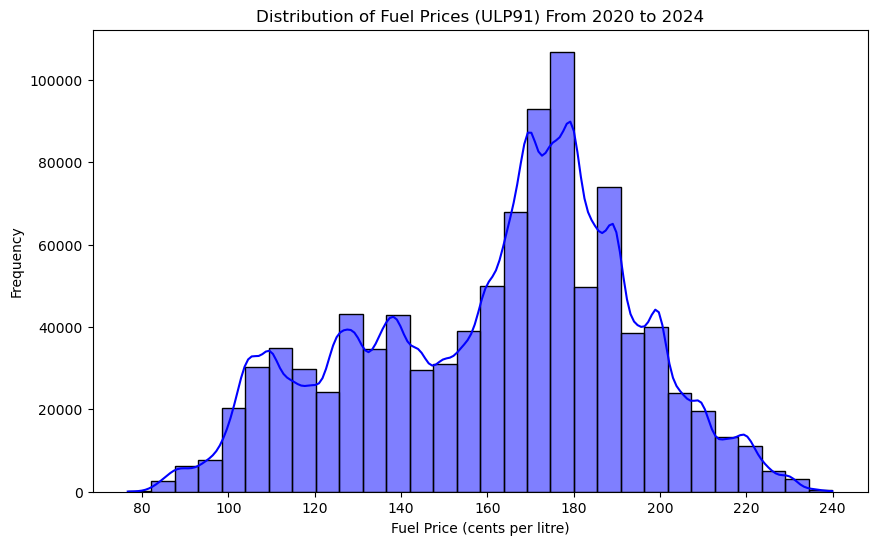

In [5]:
# Histogram for the fuel price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['PRODUCT_PRICE'], bins=30, kde=True, color='blue')
plt.title('Distribution of Fuel Prices (ULP91) From 2020 to 2024')
plt.xlabel('Fuel Price (cents per litre)')
plt.ylabel('Frequency')
plt.show()

# Correlation Analysis

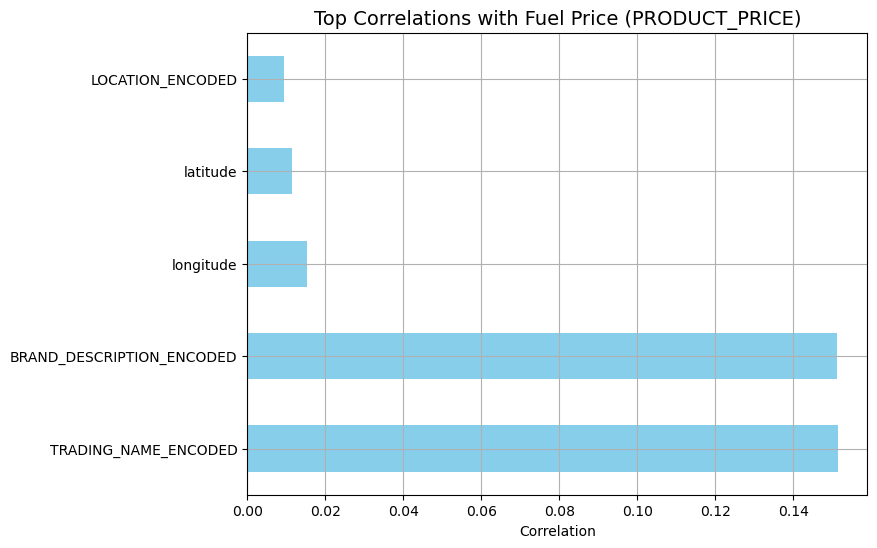

In [6]:
encoded_data = data_cleaned

# Encoding all relevant categorical columns
categorical_columns = ['TRADING_NAME', 'BRAND_DESCRIPTION', 'PRODUCT_DESCRIPTION', 'AREA_DESCRIPTION', 'REGION_DESCRIPTION', 'LOCATION']
for col in categorical_columns:
    encoded_data[col + '_ENCODED'] = encoded_data[col].astype('category').cat.codes

# Specify the relevant columns for correlation analysis
relevant_columns = ['PRODUCT_PRICE', 'latitude', 'longitude', 'POSTCODE', 
                    'BRAND_DESCRIPTION_ENCODED', 'TRADING_NAME_ENCODED', 'PRODUCT_DESCRIPTION_ENCODED',
                    'AREA_DESCRIPTION_ENCODED', 'REGION_DESCRIPTION_ENCODED', 'LOCATION_ENCODED']

# Calculate correlation matrix
correlation_matrix = encoded_data[relevant_columns].corr()

# Get correlations of PRODUCT_PRICE with other factors
price_correlations = correlation_matrix['PRODUCT_PRICE'].drop('PRODUCT_PRICE')

# Sort correlations by absolute value (strongest correlations first)
top_correlations = price_correlations.abs().sort_values(ascending=False).head(5)

# Plot only the top 5 correlations
plt.figure(figsize=(8, 6))
top_correlations.plot(kind='barh', color='skyblue')
plt.title('Top Correlations with Fuel Price (PRODUCT_PRICE)', fontsize=14)
plt.xlabel('Correlation')
plt.grid(True)
plt.show()

